In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [133]:
# Specify the Excel file path
excel_file_path = 'EDA_practice/RawData.xlsx'

# get the sheet names
xls = pd.ExcelFile(excel_file_path)
sheet_names = xls.sheet_names
print("Sheet names:", sheet_names)

# Read a specific sheet by name
sheet_orders = 'orders'
sheet_customers = 'customers'
sheet_products = 'products'
df_orders = pd.read_excel('EDA_practice/RawData.xlsx', sheet_orders)
df_products = pd.read_excel('EDA_practice/RawData.xlsx', sheet_products)
df_customers = pd.read_excel('EDA_practice/RawData.xlsx', sheet_customers)



Sheet names: ['orders', 'customers', 'products']


# Preprocessing
1) Null data
2) Duplicate value
3) Removing useless data
4) Generate new features based on previous features

In [134]:
df_orders = df_orders.drop(columns=['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price', 'Sales', 'Order ID'])
df_customers = df_customers.drop(columns=['Email', 'Phone Number', 'Customer Name', 'Address Line 1', 'Postcode'])
df_products = df_products.drop(columns=['Price per 100g' , 'Size', 'Profit'])

# Orders Dataframe

1) Order ID: A unique identifier for each coffee order.

2) Order Date: The date when the order was placed. -> Check the data type

3) Customer ID (Relation column): An identifier linking the order to a specific customer.

4) Product ID (Relation column): A unique identifier for each coffee product . -> check how many unique values we have.

5) Quantity: The quantity of the coffee product ordered.


In [135]:
df_orders

,Order Date,Customer ID,Product ID,Quantity
0,2019-09-05,17670-51384-MA,R-M-1,2
1,2019-09-05,17670-51384-MA,E-M-0.5,5
2,2021-06-17,21125-22134-PX,A-L-1,1
3,2021-07-15,23806-46781-OU,E-M-1,2
4,2021-07-15,23806-46781-OU,R-L-2.5,2
...,...,...,...,...
995,2020-01-06,43014-53743-XK,R-L-2.5,1
996,2022-05-04,62494-09113-RP,R-M-0.5,5
997,2019-10-11,62494-09113-RP,A-M-0.5,4
998,2021-08-03,64965-78386-MY,A-D-1,1


In [136]:
#Getting the basic information of data
df_orders.info()
df_orders.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   1000 non-null   datetime64[ns]
 1   Customer ID  1000 non-null   object        
 2   Product ID   1000 non-null   object        
 3   Quantity     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.4+ KB


,Quantity
count,1000.000000
mean,3.551000
std,1.681733
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000



# Customers dataframe

1) Customer ID: A unique identifier for each customer.

2) City: city of the customer.

3) Country: Country information for customers.

4) Loyalty Card: indicates wether customer has loyalty card or not.

In [137]:
df_customers

,Customer ID,City,Country,Loyalty Card
0,17670-51384-MA,Paterson,United States,Yes
1,73342-18763-UW,Crumlin,Ireland,No
2,21125-22134-PX,San Antonio,United States,Yes
3,71253-00052-RN,Springfield,United States,Yes
4,23806-46781-OU,Cill Airne,Ireland,No
...,...,...,...,...
995,43014-53743-XK,Dallas,United States,No
996,62494-09113-RP,Fort Smith,United States,No
997,10940-42739-ET,Colorado Springs,United States,Yes
998,64965-78386-MY,Whittier,United States,No


In [138]:
#Getting the basic information of data
df_customers.info()
df_customers.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer ID   1000 non-null   object
 1   City          1000 non-null   object
 2   Country       1000 non-null   object
 3   Loyalty Card  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


,Customer ID,City,Country,Loyalty Card
count,1000,1000,1000,1000
unique,1000,386,3,2
top,17670-51384-MA,Washington,United States,No
freq,1,27,782,513




# Products dataframe

1) Product ID: A unique identifier for each coffee product.

2) Coffee Type: The type or blend of coffee, such as Arabica or Robusta.

3) Roast Type: The roast level, including light, medium, or dark roast.

4) Size: Information about the product size.

5) Unit Price: The price of a single unit of the coffee product.

6) Price Per 100g: The price per 100 grams for detailed price comparisons.

7) Profit: Insights into the profitability of each coffee product.


In [139]:
df_products.head()

,Product ID,Coffee Type,Roast Type,Unit Price
0,A-L-0.2,Ara,L,3.885
1,A-L-0.5,Ara,L,7.770
2,A-L-1,Ara,L,12.950
3,A-L-2.5,Ara,L,29.785
4,A-M-0.2,Ara,M,3.375


In [140]:
#Getting the basic information of data
df_products.info()
df_products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product ID   48 non-null     object 
 1   Coffee Type  48 non-null     object 
 2   Roast Type   48 non-null     object 
 3   Unit Price   48 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.6+ KB


,Unit Price
count,48.000000
mean,13.046250
std,9.953578
min,2.685000
25%,5.216250
50%,9.230000
75%,17.033750
max,36.455000


#### Generate new features 
1) Merge product and orders dataframe
2) Multiply unite price by quantity and save the values in a new column named sale

In [141]:
df_product_order = pd.merge(left=df_products, right=df_orders, on='Product ID')

In [142]:
df_product_order

,Product ID,Coffee Type,Roast Type,Unit Price,Order Date,Customer ID,Quantity
0,A-L-0.2,Ara,L,3.885,2019-06-28,36078-91009-WU,2
1,A-L-0.2,Ara,L,3.885,2021-04-05,08847-29858-HN,2
2,A-L-0.2,Ara,L,3.885,2021-10-02,47939-53158-LS,1
3,A-L-0.2,Ara,L,3.885,2020-05-19,68412-11126-YJ,4
4,A-L-0.2,Ara,L,3.885,2022-04-30,43974-44760-QI,2
...,...,...,...,...,...,...,...
995,E-D-2.5,Exc,D,27.945,2019-10-08,95152-82155-VQ,1
996,E-D-2.5,Exc,D,27.945,2019-01-09,34419-18068-AG,4
997,E-D-2.5,Exc,D,27.945,2021-09-06,76209-39601-ZR,3
998,E-D-2.5,Exc,D,27.945,2022-06-10,86579-92122-OC,1


In [143]:
df_product_order['sales'] = df_product_order['Quantity'] * df_product_order['Unit Price']

In [144]:
df_product_order

,Product ID,Coffee Type,Roast Type,Unit Price,Order Date,Customer ID,Quantity,sales
0,A-L-0.2,Ara,L,3.885,2019-06-28,36078-91009-WU,2,7.770
1,A-L-0.2,Ara,L,3.885,2021-04-05,08847-29858-HN,2,7.770
2,A-L-0.2,Ara,L,3.885,2021-10-02,47939-53158-LS,1,3.885
3,A-L-0.2,Ara,L,3.885,2020-05-19,68412-11126-YJ,4,15.540
4,A-L-0.2,Ara,L,3.885,2022-04-30,43974-44760-QI,2,7.770
...,...,...,...,...,...,...,...,...
995,E-D-2.5,Exc,D,27.945,2019-10-08,95152-82155-VQ,1,27.945
996,E-D-2.5,Exc,D,27.945,2019-01-09,34419-18068-AG,4,111.780
997,E-D-2.5,Exc,D,27.945,2021-09-06,76209-39601-ZR,3,83.835
998,E-D-2.5,Exc,D,27.945,2022-06-10,86579-92122-OC,1,27.945


# Merge product_order with customers
* Drop unnecessary columns

In [145]:
df_product_order_customer = pd.merge(left=df_product_order, right=df_customers, on='Customer ID')

In [146]:
df_product_order_customer = df_product_order_customer.drop(columns=['Product ID'])
df_product_order_customer['Unit Price'] = df_product_order_customer['Unit Price'].round(2)
df_product_order_customer['sales'] = df_product_order_customer['sales'].round(2)


In [164]:
df_product_order_customer = df_product_order_customer.sort_values(by='sales')
df_product_order_customer


,Coffee Type,Roast Type,Unit Price,Order Date,Customer ID,Quantity,sales,City,Country,Loyalty Card
502,Rob,D,2.68,2019-06-17,84996-26826-DK,1,2.68,Jamaica,United States,Yes
504,Rob,D,2.68,2021-02-19,55427-08059-DF,1,2.68,Booterstown,Ireland,Yes
482,Rob,D,2.68,2021-06-20,57235-92842-DK,1,2.68,Fort Lauderdale,United States,No
415,Rob,M,2.98,2020-05-09,34704-83143-KS,1,2.98,Stockton,United States,No
403,Rob,M,2.98,2020-02-18,08909-77713-CG,1,2.98,Charlotte,United States,Yes
...,...,...,...,...,...,...,...,...,...,...
857,Exc,L,34.15,2019-12-04,78224-60622-KH,6,204.93,Tyler,United States,No
853,Exc,L,34.15,2022-06-13,16123-07017-TY,6,204.93,Toledo,United States,No
851,Exc,L,34.15,2019-12-14,04739-85772-QT,6,204.93,Sparks,United States,Yes
858,Exc,L,34.15,2019-07-25,53971-49906-PZ,6,204.93,Decatur,United States,No


# Finding patterns and insights
* Which Coffee Type is sold more?

"Espresso" is the most popular coffee type with sales of $12,306.37, while "Robusta" is the least popular with sales of $9,005.16.
* Which Roast Type is sold more?

Light roast is the preferred option with sales totaling $17,354.34, while dark roast is less favored with sales of $13,179.22.
* Plot the top 7 most profitable cities.

"Washington" leads the way with the highest sales, totaling $1,066.91, and "Philadelphia" lags behind with sales of $511.23 among the top 7 most profitable cities.
* Which country is more profitable?

The United States is the most profitable country with sales amounting to $35,638.60, while the United Kingdom ranks as the least profitable with sales of $2,798.50.
* Which group is more profitable, loyalty card owners, or non-owners?

Although customers without loyalty cards tend to spend more, the total sales are nearly on par with customers who do have loyalty cards.
* Which year had the highest sales?

In 2021, the highest sales were recorded at $13,766.04, while 2022 had the lowest sales at $7,063.33.
* Is there any relation between unit price and quantity? Are customers more inclined towards cheaper or more expensive products?

There appears to be a modest relationship, with an increase in price leading to a decrease in quantity. However, due to the limited data, this relationship is not particularly significant.

  Coffee Type     sales
1         Exc  12306.37
2         Lib  12054.05
0         Ara  11768.33
3         Rob   9005.16


<Axes: xlabel='Coffee Type', ylabel='sales'>

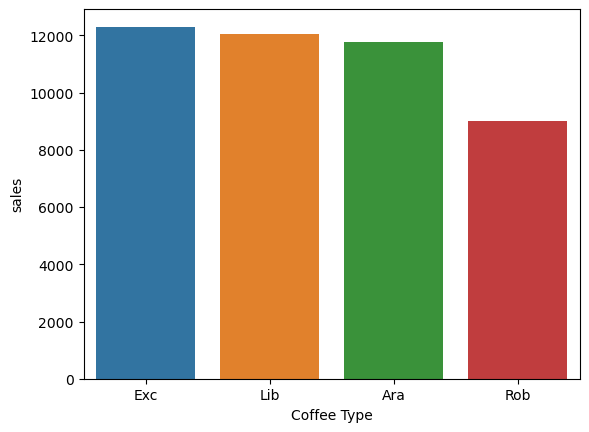

In [232]:
# Group by 'coffee type' and calculate the total sales for each type
total_sales_per_coffee = df_product_order_customer.groupby('Coffee Type')['sales'].sum().reset_index()
total_sales_per_coffee = total_sales_per_coffee.sort_values(by='sales' , ascending=False)
print(total_sales_per_coffee)
sns.barplot(x=total_sales_per_coffee['Coffee Type'], y=total_sales_per_coffee['sales'])

  Roast Type     sales
1          L  17354.34
2          M  14600.35
0          D  13179.22


<Axes: xlabel='Roast Type', ylabel='sales'>

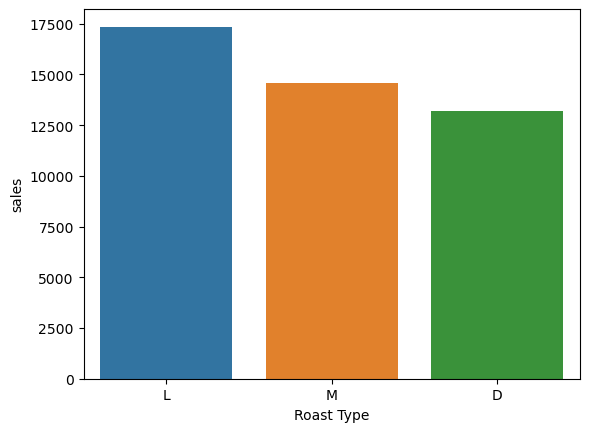

In [200]:
# Group by 'coffee type' and calculate the total sales for each type
total_sales_per_roast = df_product_order_customer.groupby('Roast Type')['sales'].sum().reset_index()
total_sales_per_roast = total_sales_per_roast.sort_values(by='sales' , ascending=False)
print(total_sales_per_roast)
sns.barplot(x=total_sales_per_roast['Roast Type'], y=total_sales_per_roast['sales'])

              City    sales
359     Washington  1066.91
160        Houston   819.75
340         Toledo   774.19
250  New York City   772.74
295     Sacramento   627.74
279       Portland   580.26
272   Philadelphia   511.23


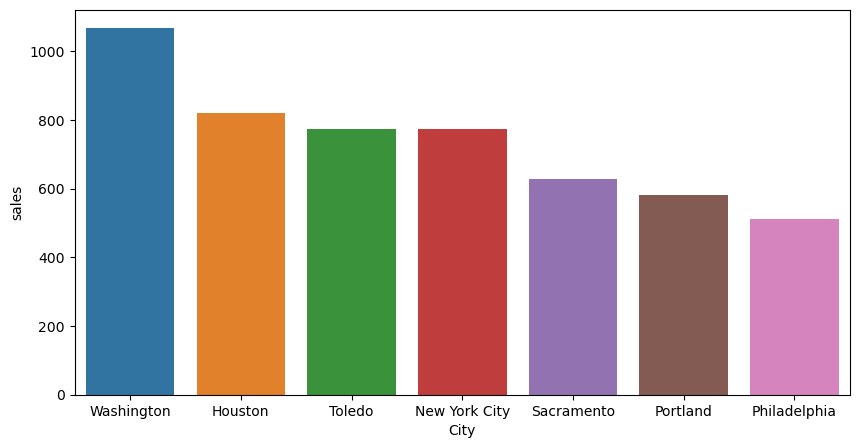

In [210]:
# Group by 'coffee type' and calculate the total sales for each type
plt.figure(figsize=(10, 5))
total_sales_per_city = df_product_order_customer.groupby('City')['sales'].sum().reset_index()
total_sales_per_city = total_sales_per_city.sort_values(by='sales' , ascending=False).head(7)
print(total_sales_per_city)
sns.barplot(x=total_sales_per_city['City'], y=total_sales_per_city['sales'])
plt.show()

          Country     sales
2   United States  35638.60
0         Ireland   6696.81
1  United Kingdom   2798.50


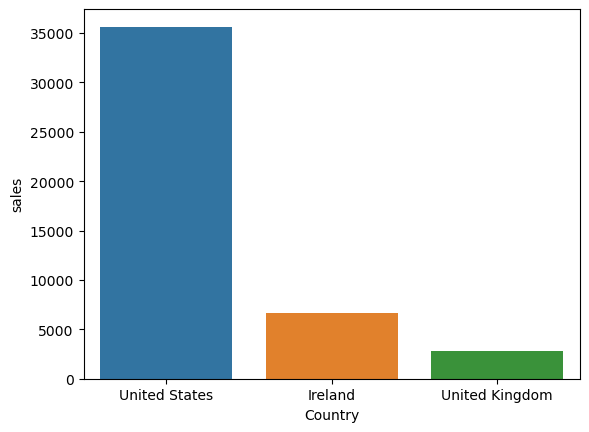

In [211]:
total_sales_per_country = df_product_order_customer.groupby('Country')['sales'].sum().reset_index()
total_sales_per_country = total_sales_per_country.sort_values(by='sales' , ascending=False)
print(total_sales_per_country)
sns.barplot(x=total_sales_per_country['Country'], y=total_sales_per_country['sales'])
plt.show()

  Loyalty Card     sales
0           No  24216.22
1          Yes  20917.69


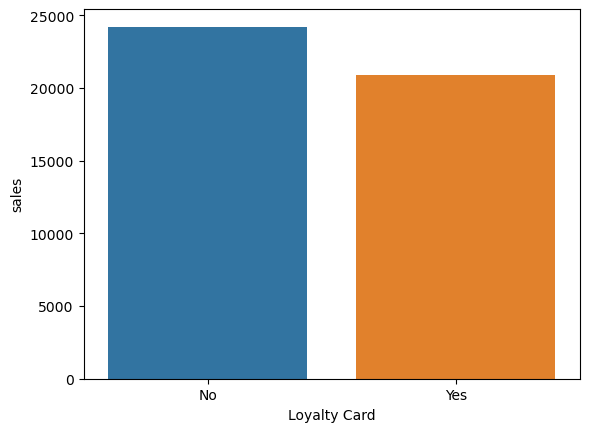

In [212]:
total_sales_per_loyalty = df_product_order_customer.groupby('Loyalty Card')['sales'].sum().reset_index()
total_sales_per_loyalty = total_sales_per_loyalty.sort_values(by='sales' , ascending=False)
print(total_sales_per_loyalty)
sns.barplot(x=total_sales_per_loyalty['Loyalty Card'], y=total_sales_per_loyalty['sales'])
plt.show()

<Axes: xlabel='Quantity', ylabel='Unit Price'>

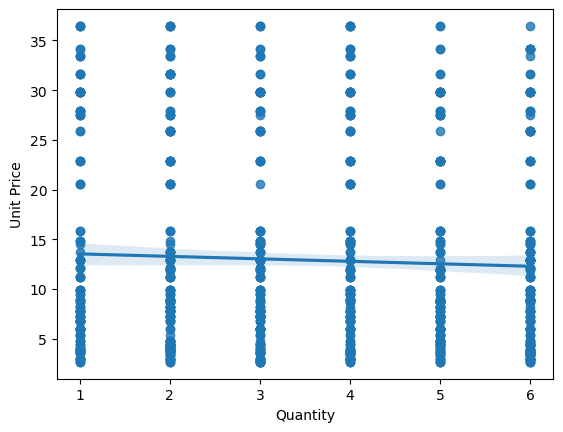

In [216]:
sns.regplot(y='Unit Price', x='Quantity', data=df_product_order_customer)

   Order Date     sales
2        2021  13766.04
0        2019  12187.10
1        2020  12117.44
3        2022   7063.33


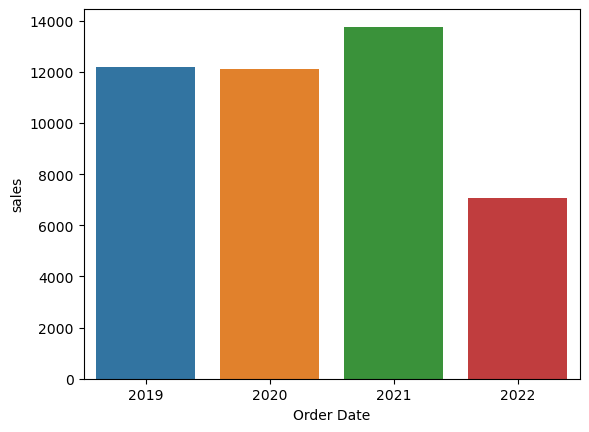

In [229]:
order_year = df_product_order_customer['Order Date'].dt.year
total_sales_per_year = df_product_order_customer.groupby(order_year)['sales'].sum().reset_index()
total_sales_per_year = total_sales_per_year.sort_values(by='sales' , ascending=False)
print(total_sales_per_year)
sns.barplot(x=total_sales_per_year['Order Date'], y=total_sales_per_year['sales'])
plt.show()